In [1]:
import pandas as pd
train_df = pd.read_csv('Vinod-TRAIN.csv',index_col='ID')
test_df = pd.read_csv('Vinod-TEST.csv',index_col='ID')

In [2]:
train_df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
ID,,,,,,,,,,,,,,,,,,,,
Vinod1,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),91,6638,No
Vinod2,Male,0,Yes,No,27,Yes,Yes,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Mailed check,81,2204,No
Vinod3,Female,0,No,No,10,Yes,No,onlyViaER,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,Month-to-month,Yes,Mailed check,21,247,No
Vinod4,Male,0,No,No,21,No,Maryville,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,44,1012,No
Vinod5,Female,0,Yes,No,26,Yes,Yes,onlyViaER,Maryville,Maryville,Maryville,Maryville,Maryville,Maryville,One year,No,Mailed check,26,684,No


In [3]:
test_df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
ID,,,,,,,,,,,,,,,,,,,
Vinod1,Male,0,No,No,52,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Electronic check,54,2791
Vinod2,Male,1,Yes,No,45,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),75,3480
Vinod3,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,91,91
Vinod4,Male,0,Yes,Yes,68,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),106,7323
Vinod5,Female,0,Yes,Yes,39,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,60,2342


In [4]:
# train data types
train_df.dtypes

gender              object
Management           int64
USAcitizen          object
Married             object
MonthsInUnion        int64
ContinuingEd        object
FeatureA            object
Connectivity        object
FeatureC            object
FeatureD            object
FeatureE            object
FeatureF            object
FeatureG            object
FeatureB            object
DuesFrequency       object
PaperlessBilling    object
PaymentMethod       object
MonthlyDues          int64
TotalDues           object
LeftUnion           object
dtype: object

In [5]:
train_df.describe()

,Management,MonthsInUnion,MonthlyDues
count,999.000000,999.000000,999.000000
mean,0.164164,33.236236,79.848849
std,0.370610,37.870074,388.229471
min,0.000000,0.000000,19.000000
25%,0.000000,9.000000,26.000000
50%,0.000000,28.000000,70.000000
75%,0.000000,53.000000,86.000000
max,1.000000,620.000000,10878.000000


In [6]:
train_df.isna().sum()

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

In [7]:
test_df.isna().sum()

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
categories1 = train_df.select_dtypes(include='object').columns.tolist()
categories2 = test_df.select_dtypes(include='object').columns.tolist()
encoder = LabelEncoder()
for col in categories1:
    train_df[col] = encoder.fit_transform(train_df[col])
for col in categories2:
    test_df[col] = encoder.fit_transform(test_df[col])

In [9]:
test_df.to_csv('Vinod_Test.csv')
train_df.to_csv('Vinod_Train.csv')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = train_df.drop(columns='LeftUnion')
y_train = train_df['LeftUnion']
X_test = test_df

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [11]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns.tolist())
X_test_scaled.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,0.977236,-0.43832,-0.979195,-0.702334,0.820123,0.353553,-0.442283,-1.245849,1.323530,-0.151474,1.184121,-0.107511,-0.234595,-0.226265,0.341977,-1.183825,0.384036,-0.346062,0.239073
1,0.977236,2.28144,1.021247,-0.702334,0.534338,0.353553,1.086577,-1.245849,1.323530,-0.151474,1.184121,1.305687,-0.234595,1.095600,1.536503,-1.183825,-0.547158,0.348014,0.541604
2,-1.023294,2.28144,1.021247,-0.702334,-1.262020,0.353553,1.086577,0.613155,-0.098197,1.224188,-0.174016,-0.107511,1.082037,-0.226265,-0.852550,0.844719,0.384036,0.876833,-0.946462
3,0.977236,-0.43832,1.021247,1.423823,1.473344,0.353553,-0.442283,0.613155,-0.098197,1.224188,1.184121,1.305687,1.082037,1.095600,0.341977,-1.183825,-0.547158,1.372601,2.229016
4,-1.023294,-0.43832,1.021247,1.423823,0.289381,0.353553,-0.442283,-1.245849,-0.098197,-0.151474,1.184121,-0.107511,1.082037,-0.226265,-0.852550,0.844719,1.315230,-0.147754,0.041923


In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns.tolist())
X_train_scaled.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,-0.981158,-0.443179,1.075950,-0.627141,1.024112,0.316576,1.040346,-1.270295,1.327643,1.229485,1.220516,1.405062,1.168682,1.143946,1.633833,0.851697,-1.570595,0.028737,1.181660
1,1.019203,-0.443179,1.075950,-0.627141,-0.164757,0.316576,1.040346,-1.270295,1.327643,-0.099796,-0.104805,1.405062,1.168682,1.143946,0.412127,-1.174126,1.282177,0.002967,-0.758943
2,-0.981158,-0.443179,-0.929412,-0.627141,-0.613885,0.316576,-0.529602,1.441297,-1.421197,-1.429076,-1.430126,-1.419198,-1.437374,-1.441579,-0.809579,0.851697,1.282177,-0.151659,-0.631488
3,1.019203,-0.443179,-0.929412,-0.627141,-0.323273,-3.158801,-2.099550,-1.270295,1.327643,-0.099796,-0.104805,1.405062,1.168682,-0.148816,-0.809579,0.851697,1.282177,-0.092386,-1.704575
4,-0.981158,-0.443179,1.075950,-0.627141,-0.191176,0.316576,1.040346,1.441297,-1.421197,-1.429076,-1.430126,-1.419198,-1.437374,-1.441579,0.412127,-1.174126,1.282177,-0.138773,1.235109


array([[<Axes: title={'center': 'MonthsInUnion'}>,
        <Axes: title={'center': 'TotalDues'}>]], dtype=object)

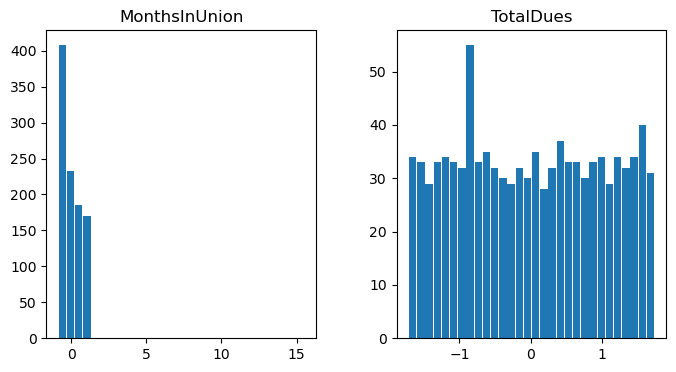

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train_scaled.hist(column=['MonthsInUnion','TotalDues'],figsize=(8,4), bins=30, grid=False, rwidth=0.9)

<Axes: title={'center': 'MonthsInUnion'}, xlabel='gender'>

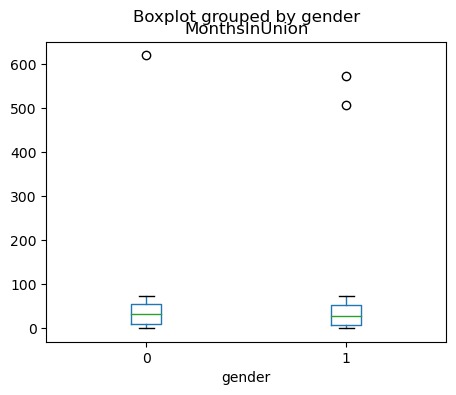

In [14]:
train_df.boxplot(by='gender',column='MonthsInUnion',grid=False, figsize=(5,4))

<Axes: title={'center': 'TotalDues'}, xlabel='gender'>

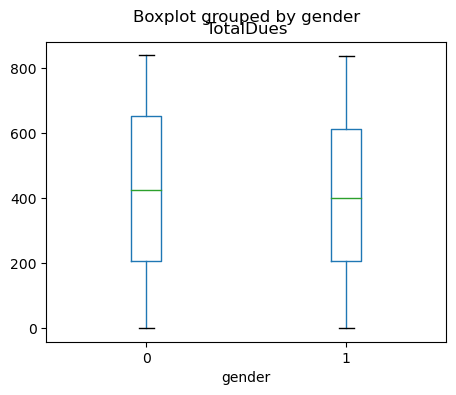

In [15]:
train_df.boxplot(by='gender',column='TotalDues',grid=False, figsize=(5,4))

<Axes: title={'center': 'TotalDues'}, xlabel='FeatureD'>

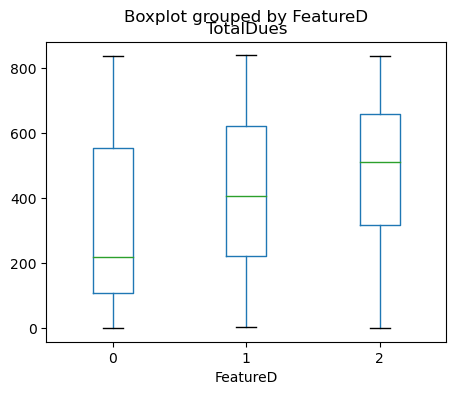

In [16]:
train_df.boxplot(by='FeatureD',column='TotalDues',grid=False, figsize=(5,4))

<Axes: xlabel='TotalDues', ylabel='MonthsInUnion'>

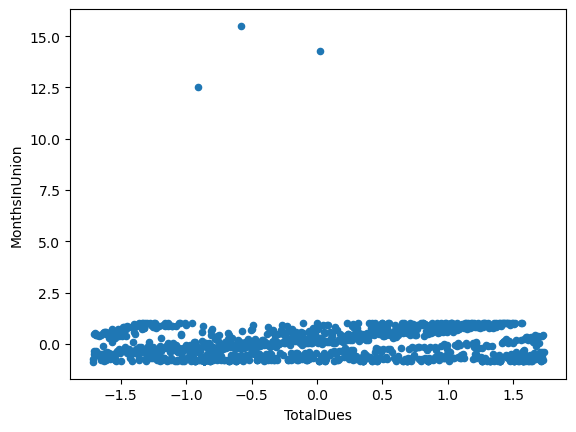

In [17]:
X_train_scaled.plot.scatter(x='TotalDues',y='MonthsInUnion')

<Axes: xlabel='MonthsInUnion', ylabel='MonthlyDues'>

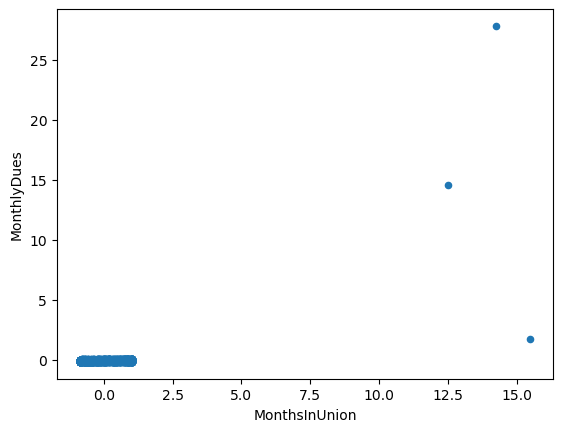

In [18]:
X_train_scaled.plot.scatter(x='MonthsInUnion',y='MonthlyDues')

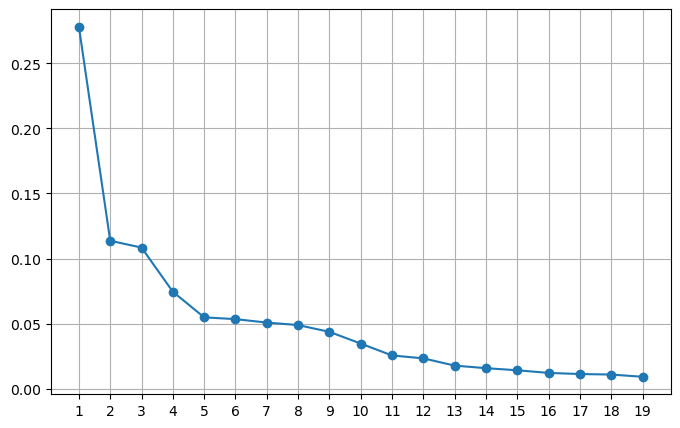

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

In [20]:
pca = PCA(n_components=5)
pca_Xtrain = pca.fit_transform(X_train_scaled)
pca_Xtest = pca.fit_transform(X_test_scaled)

In [21]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(pca_Xtrain,y_train)
lr_pred = lr_model.predict(pca_Xtest)
print('Logistic Regression Results:')
print(lr_pred)

Logistic Regression Results:
[0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(pca_Xtrain,y_train)
rf_pred = rf_model.predict(pca_Xtest)
print('Random Forest Prediction:')
print(rf_pred)

Random Forest Prediction:
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0

In [23]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(pca_Xtrain,y_train)
dt_pred = dt_model.predict(pca_Xtest)
print('Decision Tree Predictions:')
print(dt_pred)

Decision Tree Predictions:
[0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 